In [ ]:
!ls

drive  sample_data


In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%cd 2022-05-11\ 선형회귀모델

/content/drive/MyDrive/Colab Notebooks/2022-05-11 선형회귀모델


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
weather_aod_0505_0523 = pd.read_csv('./data/weather_aod_0505_0523.csv', encoding='utf-8')
weather_aod_0505_0523 = weather_aod_0505_0523.drop([weather_aod_0505_0523.columns[0], weather_aod_0505_0523.columns[1]], axis=1)
weather_aod_0505_0523

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,05-05 00:00:00,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,05-05 00:00:10,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,05-05 00:00:20,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,05-05 00:00:30,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,05-05 00:00:40,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...
155516,05-22 23:59:20,21.920166,0.0,0.063679,98.978736,0.0,9.912798,1509.778732,23.579250,0.0
155517,05-22 23:59:30,22.025666,0.0,0.171538,99.084766,0.0,9.914665,1085.456078,23.545740,0.0
155518,05-22 23:59:40,21.930888,0.0,0.092957,99.040640,0.0,9.938890,1305.816996,23.582532,0.0
155519,05-22 23:59:50,22.086412,0.0,0.184221,99.034333,0.0,9.945624,793.150729,23.584564,0.0


In [ ]:
# 5월6일 01:00:00 ~ 5월16일 01:00:00 까지의 날씨 (한 시간 후의 날씨 데이터)
after_hour_weather = weather_aod_0505_0523.loc[9000:95400,'date_time':'ground_temp']
after_hour_weather

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
9000,05-06 01:00:00,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062
9001,05-06 01:00:10,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084
9002,05-06 01:00:20,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159
9003,05-06 01:00:30,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513
9004,05-06 01:00:40,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097
...,...,...,...,...,...,...,...,...,...
95396,05-16 00:59:20,18.283050,0.0,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161
95397,05-16 00:59:30,18.129412,0.0,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846
95398,05-16 00:59:40,18.382404,0.0,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558
95399,05-16 00:59:50,18.330052,0.0,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875


In [ ]:
after_hour_weather.to_csv('./data/new_after_hour_weather.csv')

In [ ]:
after_hour_weather = pd.read_csv('./data/new_after_hour_weather.csv', encoding='utf-8')
after_hour_weather = after_hour_weather.drop(after_hour_weather.columns[0], axis=1)
after_hour_weather

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
0,05-06 01:00:00,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062
1,05-06 01:00:10,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084
2,05-06 01:00:20,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159
3,05-06 01:00:30,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513
4,05-06 01:00:40,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097
...,...,...,...,...,...,...,...,...,...
86396,05-16 00:59:20,18.283050,0.0,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161
86397,05-16 00:59:30,18.129412,0.0,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846
86398,05-16 00:59:40,18.382404,0.0,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558
86399,05-16 00:59:50,18.330052,0.0,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875


In [ ]:
# 5월6일 00:00:00 ~ 5월16일 00:00:00 까지의 발전량 (현재 발전량)
now_aod = weather_aod_0505_0523.loc[8640:95040, 'aod']
now_aod = pd.DataFrame(now_aod)
now_aod

,aod
8640,0.0
8641,0.0
8642,0.0
8643,0.0
8644,0.0
...,...
95036,0.0
95037,0.0
95038,0.0
95039,0.0


In [ ]:
now_aod.to_csv('./data/new_now_aod.csv')

In [ ]:
now_aod = pd.read_csv('./data/new_now_aod.csv', encoding='utf-8')
now_aod = now_aod.drop(now_aod.columns[0], axis=1)
now_aod

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86396,0.0
86397,0.0
86398,0.0
86399,0.0


In [ ]:
now_aod.columns = ['now_aod']
now_aod

,now_aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86396,0.0
86397,0.0
86398,0.0
86399,0.0


In [ ]:
# 5월5일 23:00:00 ~ 5월15일 23:00:00까지의 발전량 (한 시간 전의 발전량)
before_hour_aod = weather_aod_0505_0523.loc[8280:94680, 'aod']
pd.DataFrame(before_hour_aod)

,aod
8280,0.0
8281,0.0
8282,0.0
8283,0.0
8284,0.0
...,...
94676,0.0
94677,0.0
94678,0.0
94679,0.0


In [ ]:
before_hour_aod.to_csv('./data/new_before_hour_aod.csv')

In [ ]:
before_hour_aod = pd.read_csv('./data/new_before_hour_aod.csv', encoding='utf-8')
before_hour_aod = before_hour_aod.drop(before_hour_aod.columns[0], axis=1)
before_hour_aod

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86396,0.0
86397,0.0
86398,0.0
86399,0.0


In [ ]:
before_hour_aod.columns = ['before_hour_aod']
before_hour_aod

,before_hour_aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86396,0.0
86397,0.0
86398,0.0
86399,0.0


In [ ]:
data = pd.concat([after_hour_weather, now_aod, before_hour_aod], axis=1)
data

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,05-06 01:00:00,19.864374,0.0,0.822489,98.925436,0.0,7.547328,743.262485,20.429062,0.0,0.0
1,05-06 01:00:10,19.908106,0.0,0.883391,99.091616,0.0,6.534823,665.751451,20.591084,0.0,0.0
2,05-06 01:00:20,20.027289,0.0,0.828924,99.056635,0.0,6.820024,626.004984,20.365159,0.0,0.0
3,05-06 01:00:30,20.214164,0.0,0.895508,99.074766,0.0,7.301961,658.978883,20.482513,0.0,0.0
4,05-06 01:00:40,19.815515,0.0,0.814909,98.971507,0.0,7.149459,705.821344,20.624097,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
86396,05-16 00:59:20,18.283050,0.0,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161,0.0,0.0
86397,05-16 00:59:30,18.129412,0.0,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846,0.0,0.0
86398,05-16 00:59:40,18.382404,0.0,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558,0.0,0.0
86399,05-16 00:59:50,18.330052,0.0,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875,0.0,0.0


In [ ]:
data.to_csv('./data/new_all_data_sum.csv')

In [ ]:
# 5월6일 01:00:00 ~ 5월16일 01:00:00 까지의 발전량 (예측해야할 답)
pred_aod = weather_aod_0505_0523.loc[9000:95400,'aod']
pred_aod = pd.DataFrame(pred_aod)
pred_aod

,aod
9000,0.0
9001,0.0
9002,0.0
9003,0.0
9004,0.0
...,...
95396,0.0
95397,0.0
95398,0.0
95399,0.0


In [ ]:
pred_aod.to_csv('./data/new_pred_aod.csv')

In [ ]:
pred_aod = pd.read_csv('./data/new_pred_aod.csv', encoding='utf-8')
pred_aod = pred_aod.drop(pred_aod.columns[0], axis=1)
pred_aod

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86396,0.0
86397,0.0
86398,0.0
86399,0.0


In [ ]:
# train 데이터와 test 데이터 나누기
# train 데이터 : 5월6일 00:00:00 ~ 5월13일 23:00:00)
x_train = data.loc[:68760, 'temperature':'before_hour_aod']
x_train

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,19.864374,0.000000,0.822489,98.925436,0.0,7.547328,743.262485,20.429062,0.0,0.0
1,19.908106,0.000000,0.883391,99.091616,0.0,6.534823,665.751451,20.591084,0.0,0.0
2,20.027289,0.000000,0.828924,99.056635,0.0,6.820024,626.004984,20.365159,0.0,0.0
3,20.214164,0.000000,0.895508,99.074766,0.0,7.301961,658.978883,20.482513,0.0,0.0
4,19.815515,0.000000,0.814909,98.971507,0.0,7.149459,705.821344,20.624097,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
68756,18.915578,0.095790,-0.006373,98.991428,0.0,7.388104,558.287537,20.670519,0.0,0.0
68757,18.951352,0.056517,0.089290,99.070308,0.0,5.260821,564.341665,20.601264,0.0,0.0
68758,18.923087,0.124993,0.028019,99.000653,0.0,6.054787,556.525471,20.539241,0.0,0.0
68759,18.928185,0.038324,0.087255,98.992920,0.0,6.341082,550.743296,20.669349,0.0,0.0


In [ ]:
x_train.to_csv('./data/new_X_train.csv')

In [ ]:
X_train = np.array(x_train)
print(f"X_train.shape = {X_train.shape}")
X_train

X_train.shape = (68761, 10)


array([[19.86437382,  0.        ,  0.82248939, ..., 20.42906155,
         0.        ,  0.        ],
       [19.90810568,  0.        ,  0.88339129, ..., 20.59108412,
         0.        ,  0.        ],
       [20.02728917,  0.        ,  0.82892439, ..., 20.36515904,
         0.        ,  0.        ],
       ...,
       [18.92308743,  0.1249926 ,  0.02801933, ..., 20.53924102,
         0.        ,  0.        ],
       [18.92818522,  0.03832407,  0.08725535, ..., 20.66934907,
         0.        ,  0.        ],
       [18.87309267,  0.24493077,  0.67007258, ..., 20.51350591,
         0.        ,  0.        ]])

In [ ]:
y_train = pred_aod.loc[:68760, :]
y_train

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
68756,0.0
68757,0.0
68758,0.0
68759,0.0


In [ ]:
y_train.to_csv('./data/new_y_train.csv')

In [ ]:
y_train = np.array(y_train)
print(f"y_train.shape = {y_train.shape}")
y_train

y_train.shape = (68761, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
# test 데이터는 2일치 (5월14일 00:00:00 ~ 5월16일 00:00:00)
x_test = data.loc[69120:, 'date_time':'before_hour_aod']
x_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
69120,05-14 01:00:00,18.617831,0.516401,0.809384,98.959057,0.0,10.059022,293.356097,20.498976,0.0,0.0
69121,05-14 01:00:10,18.651926,0.569257,0.805434,99.057296,0.0,9.966155,315.298922,20.488344,0.0,0.0
69122,05-14 01:00:20,18.662691,0.494146,0.792034,99.099421,0.0,9.988373,365.335158,20.460186,0.0,0.0
69123,05-14 01:00:30,18.659062,0.543059,0.806897,99.064737,0.0,9.969104,318.862476,20.481378,0.0,0.0
69124,05-14 01:00:40,18.625796,0.562925,0.807858,98.908900,0.0,10.052210,326.792033,20.459964,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
86396,05-16 00:59:20,18.283050,0.000000,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161,0.0,0.0
86397,05-16 00:59:30,18.129412,0.000000,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846,0.0,0.0
86398,05-16 00:59:40,18.382404,0.000000,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558,0.0,0.0
86399,05-16 00:59:50,18.330052,0.000000,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875,0.0,0.0


In [ ]:
x_test.to_csv('./data/new_X_test.csv')

In [ ]:
X_test = pd.read_csv('./data/new_X_test.csv', encoding='utf-8')
X_test = X_test.drop(X_test.columns[0], axis=1)
X_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,05-14 01:00:00,18.617831,0.516401,0.809384,98.959057,0.0,10.059022,293.356097,20.498976,0.0,0.0
1,05-14 01:00:10,18.651926,0.569257,0.805434,99.057296,0.0,9.966155,315.298922,20.488344,0.0,0.0
2,05-14 01:00:20,18.662691,0.494146,0.792034,99.099421,0.0,9.988373,365.335158,20.460186,0.0,0.0
3,05-14 01:00:30,18.659062,0.543059,0.806897,99.064737,0.0,9.969104,318.862476,20.481378,0.0,0.0
4,05-14 01:00:40,18.625796,0.562925,0.807858,98.908900,0.0,10.052210,326.792033,20.459964,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17276,05-16 00:59:20,18.283050,0.000000,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161,0.0,0.0
17277,05-16 00:59:30,18.129412,0.000000,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846,0.0,0.0
17278,05-16 00:59:40,18.382404,0.000000,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558,0.0,0.0
17279,05-16 00:59:50,18.330052,0.000000,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875,0.0,0.0


In [ ]:
X_test.to_csv('./data/new_X_test.csv')

In [ ]:
X_test = X_test.loc[:, 'temperature':]
X_test

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,18.617831,0.516401,0.809384,98.959057,0.0,10.059022,293.356097,20.498976,0.0,0.0
1,18.651926,0.569257,0.805434,99.057296,0.0,9.966155,315.298922,20.488344,0.0,0.0
2,18.662691,0.494146,0.792034,99.099421,0.0,9.988373,365.335158,20.460186,0.0,0.0
3,18.659062,0.543059,0.806897,99.064737,0.0,9.969104,318.862476,20.481378,0.0,0.0
4,18.625796,0.562925,0.807858,98.908900,0.0,10.052210,326.792033,20.459964,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17276,18.283050,0.000000,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161,0.0,0.0
17277,18.129412,0.000000,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846,0.0,0.0
17278,18.382404,0.000000,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558,0.0,0.0
17279,18.330052,0.000000,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875,0.0,0.0


In [ ]:
X_test = np.array(X_test)
print(f"X_test.shape = {X_test.shape}")
X_test

X_test.shape = (17281, 10)


array([[18.61783062,  0.51640084,  0.80938449, ..., 20.49897593,
         0.        ,  0.        ],
       [18.65192644,  0.56925657,  0.80543435, ..., 20.48834361,
         0.        ,  0.        ],
       [18.66269063,  0.4941459 ,  0.79203416, ..., 20.46018555,
         0.        ,  0.        ],
       ...,
       [18.38240386,  0.        ,  0.24205367, ..., 19.31855832,
         0.        ,  0.        ],
       [18.33005219,  0.        ,  0.16932553, ..., 19.51387543,
         0.        ,  0.        ],
       [18.43435631,  0.        ,  0.22073599, ..., 19.75290977,
         0.        ,  0.        ]])

In [ ]:
y_test = pred_aod.loc[69120:, :]
y_test.to_csv('./data/new_y_test.csv')

In [ ]:
y_test = pd.read_csv('./data/new_y_test.csv', encoding='utf-8')
y_test = y_test.drop(y_test.columns[0], axis=1)
y_test

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [ ]:
y_test.to_csv('./data/new_y_test.csv')

In [ ]:
y_test = np.array(y_test)
print(f"y_test.shape = {y_test.shape}")
y_test

y_test.shape = (17281, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.linear_model import LinearRegression # 회귀 모델

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)  # 지도학습 방법 (회귀)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

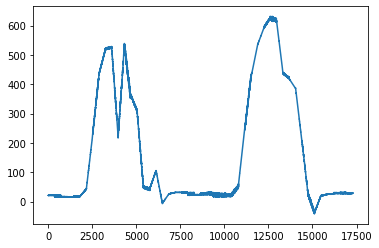

In [ ]:
plt.plot(pred)

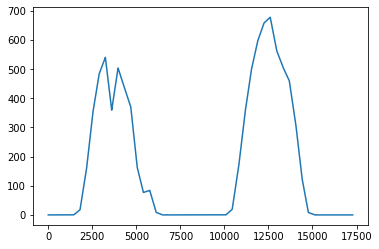

In [ ]:
plt.plot(y_test)

In [ ]:
model.score(X_test,y_test)

0.9356230835419342

In [ ]:
# 모델 저장
import pickle
with open('LinearRegression_model.pickle', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)